Import library

In [1]:
from fastai import *
from fastai.vision import *

Path to dataset

In [2]:
path = Path("/notebooks/storage/dataset-resized"); path

PosixPath('/notebooks/storage/dataset-resized')

Create the fastai image data bunch

In [3]:
data = ImageDataBunch.from_folder(path,train='train',valid='valid',test='test',ds_tfms=get_transforms(),bs=64,size=224).normalize(imagenet_stats); data

ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (326 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /notebooks/storage/dataset-resized

Import the trained resnet 50 model

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate])

Find and plot the learning rate

In [5]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


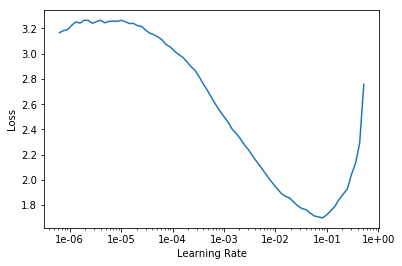

In [6]:
learn.recorder.plot()

Fit the model to the dataset

In [9]:
learn.fit_one_cycle(10,max_lr=5e-04)

epoch,train_loss,valid_loss,error_rate,time
0,2.455371,0.913940,0.303681,00:27
1,1.530841,0.511537,0.165644,00:27
2,1.038516,0.481070,0.147239,00:27
3,0.767662,0.395254,0.116564,00:27
4,0.563352,0.322474,0.085890,00:27
5,0.436995,0.305605,0.095092,00:27
6,0.345297,0.278010,0.082822,00:27
7,0.286681,0.267077,0.076687,00:27
8,0.241003,0.278312,0.082822,00:27
9,0.202400,0.275750,0.079755,00:27


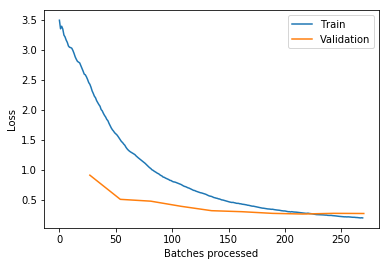

In [10]:
learn.recorder.plot_losses()

Display the errors made on validation set

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

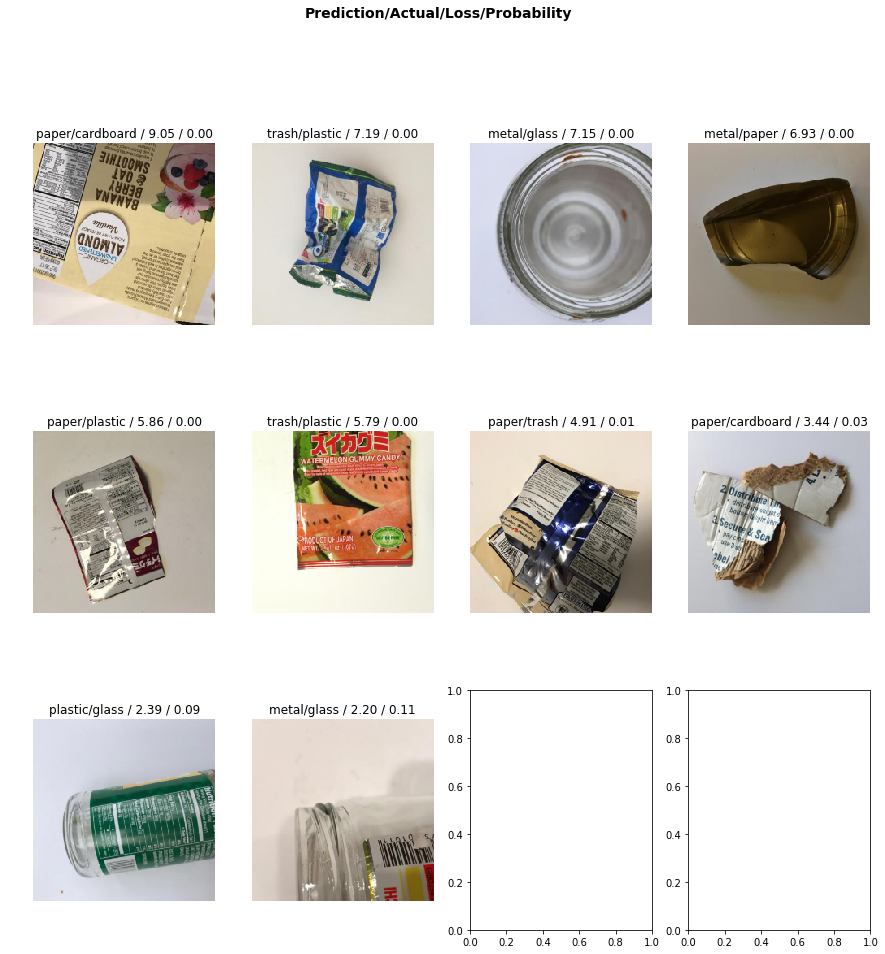

In [12]:
interp.plot_top_losses(10, figsize=(15,15))

Plot the confusion matrix for validation set

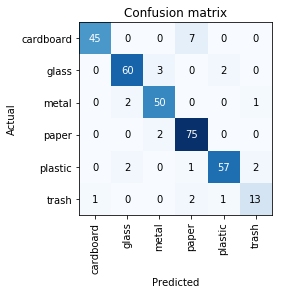

In [13]:
interp.plot_confusion_matrix()

Export model alongwith all transformations, classes, normalization, etc on dataset

In [ ]:
learn.export('export-res50')

Save the model weights

In [16]:
learn.save("stage-3-res50",return_path = True)


PosixPath('/notebooks/storage/dataset-resized/models/stage-3-res50.pth')

Get predictions on test set

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test); preds[0]

In [ ]:
max(preds[0][0]).item()
#reds[0][0]

In [ ]:
output_list = []
for i in range (len(preds[0])):
    indx = np.argmax(preds[0][i]).item()
    prediction = str(preds[0][i][indx].item())
    output_list.append({data.classes[indx]:prediction})
print(len(output_list))


Lets pick a random test image and see how well we have done.

In [ ]:
print(output_list[279])
learn.data.test_ds[279][0]


Overload the image data bunch and supply test set along with labels as the valid set to get confusion matrix and all

In [14]:
data_test = ImageDataBunch.from_folder(path, train='train', valid='test', bs=64, size=224, ds_tfms = get_transforms()).normalize(imagenet_stats)

In [15]:
learn_test = cnn_learner(data_test, models.resnet50, metrics=[error_rate])

In [17]:
learn_test.load('stage-3-res50')

Learner(data=ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

In [18]:
interp_test = ClassificationInterpretation.from_learner(learn_test)


In [19]:
losses,idxs = interp_test.top_losses()


Add the diagonal (going left to right downwards) numbers and divide by 435 to get accuracy = 88.505%

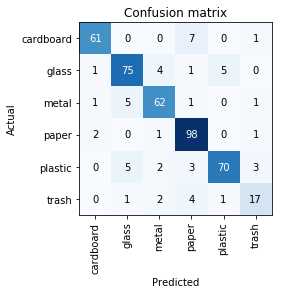

In [20]:
interp_test.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(10,figsize=(15,15))

Now lets try to improve the model further. Lets now train all layers of resnet 50. Previously we were training only a couple of layers

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


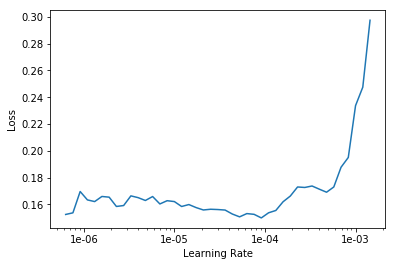

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(6, slice(1e-05, 8e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.186701,0.282590,0.070552,00:36
1,0.229626,0.446314,0.113497,00:36
2,0.206995,0.343861,0.073620,00:36
3,0.181162,0.295475,0.058282,00:36
4,0.126470,0.217636,0.049080,00:36
5,0.084733,0.214056,0.042945,00:36


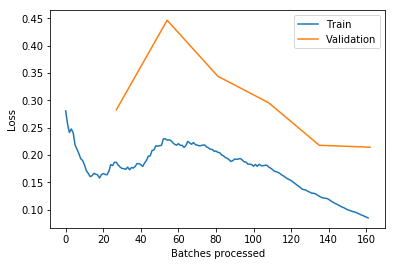

In [25]:
learn.recorder.plot_losses()

Validation error has reduced!!

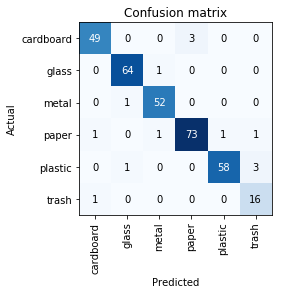

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
interp.plot_confusion_matrix()

In [27]:
learn.save('stage-4-res50')

In [28]:
data_test = ImageDataBunch.from_folder(path, train='train', valid='test', bs=64, size=224, ds_tfms = get_transforms()).normalize(imagenet_stats)
learn_test = cnn_learner(data_test, models.resnet50, metrics=[error_rate])
learn_test.load('stage-4-res50')

Learner(data=ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

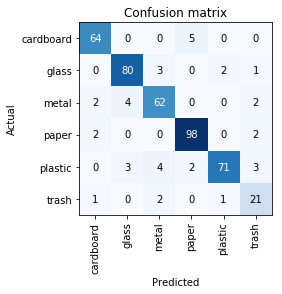

In [29]:
interp_test = ClassificationInterpretation.from_learner(learn_test)
losses,idxs = interp_test.top_losses()
interp_test.plot_confusion_matrix()

We achieved 91.034% accuracy on test set!!

In [30]:
learn.export('stage-4-res50')